# Numpy, Pandas, Matplotlib, Data Cleaning and Pandas SQL
# Assignment 1

## 2.1. Problem Statement: Numpy

### Problem Statement 1: Solution

In [1]:
import numpy as np
import os

In [3]:
def numpy_vander(array = [], column=''):
    ini_list = []
    arr_list = []
    pwr_list = []
    if column == '':
        column = len(array)
    for i in range(len(arr)):
        ini_list.append(1)
    for j in range(column):
        tmp_list = []
        for num in array:
            tmp_list.append(num**j)
        arr_list.insert(0,tmp_list)
    print (np.column_stack(arr_list))

In [8]:
arr = [1, 3, 5, 7]
numpy_vander(arr, 5)

[[   1    1    1    1    1]
 [  81   27    9    3    1]
 [ 625  125   25    5    1]
 [2401  343   49    7    1]]


In [9]:
numpy_vander(arr)

[[  1   1   1   1]
 [ 27   9   3   1]
 [125  25   5   1]
 [343  49   7   1]]


### Problem Statement 2:

In [11]:
def moving_average(inp_arr, k):
    avg_arr = []
    upto_len = len(inp_arr) - k + 1
    for i in range(upto_len):
        average = (inp_arr[i] + inp_arr[i+1] + inp_arr[i+2])/k
        avg_arr.append(average)
    return (avg_arr)

In [12]:
inp_arr = [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150]
moving_average(inp_arr, 3)

[5.0,
 4.666666666666667,
 5.666666666666667,
 6.666666666666667,
 9.666666666666666,
 28.666666666666668,
 49.333333333333336,
 72.66666666666667,
 84.0,
 93.33333333333333,
 116.33333333333333]

## 2.2. Problem Statement: Pandas

### Problem Statement 1:

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'X':[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
y=[]
i=0
for ele in df['X']:
    if ele !=0:
        i +=1
    else:
        i = 0
    y.append(i)
print (y)
df.insert(1,'Y',y)

[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]


In [3]:
df

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


In [6]:
dtindx = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B')
s = pd.Series(np.random.rand(len(dtindx)), index=dtindx)

In [7]:
s

2015-01-01    0.028334
2015-01-02    0.470575
2015-01-05    0.698515
2015-01-06    0.858217
2015-01-07    0.478078
2015-01-08    0.215958
2015-01-09    0.601275
2015-01-12    0.484021
2015-01-13    0.587888
2015-01-14    0.090775
2015-01-15    0.419945
2015-01-16    0.904030
2015-01-19    0.903812
2015-01-20    0.070857
2015-01-21    0.867225
2015-01-22    0.343551
2015-01-23    0.380107
2015-01-26    0.575831
2015-01-27    0.397639
2015-01-28    0.385388
2015-01-29    0.313479
2015-01-30    0.723544
2015-02-02    0.156950
2015-02-03    0.082735
2015-02-04    0.129434
2015-02-05    0.167322
2015-02-06    0.420854
2015-02-09    0.972556
2015-02-10    0.438764
2015-02-11    0.774925
                ...   
2015-11-20    0.617841
2015-11-23    0.218613
2015-11-24    0.337985
2015-11-25    0.225231
2015-11-26    0.080017
2015-11-27    0.068153
2015-11-30    0.917696
2015-12-01    0.011972
2015-12-02    0.662193
2015-12-03    0.569256
2015-12-04    0.232664
2015-12-07    0.372818
2015-12-08 

In [8]:
s[dtindx.weekday == 2].sum()

24.540139907883848

In [9]:
s.resample('M').mean()

2015-01-31    0.490866
2015-02-28    0.423068
2015-03-31    0.551566
2015-04-30    0.385966
2015-05-31    0.512924
2015-06-30    0.433320
2015-07-31    0.632842
2015-08-31    0.601823
2015-09-30    0.446543
2015-10-31    0.619975
2015-11-30    0.308601
2015-12-31    0.387907
Freq: M, dtype: float64

In [10]:
s.groupby(pd.Grouper(freq='M')).idxmax()

2015-01-31   2015-01-16
2015-02-28   2015-02-09
2015-03-31   2015-03-20
2015-04-30   2015-04-22
2015-05-31   2015-05-18
2015-06-30   2015-06-15
2015-07-31   2015-07-22
2015-08-31   2015-08-20
2015-09-30   2015-09-22
2015-10-31   2015-10-07
2015-11-30   2015-11-30
2015-12-31   2015-12-09
Freq: M, dtype: datetime64[ns]

### Problem Statement 2:

In [12]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv'
ps2 = pd.read_csv(url)

In [13]:
ps2.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


1) Delete unnamed columns

In [17]:
ps2.drop(ps2.columns[ps2.columns.str.contains('unnamed',case = False)], axis=1, inplace=True)

In [18]:
ps2.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [20]:
ps2['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

In [19]:
ps2['Name'].value_counts().head(5)

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64

In [21]:
ps2['Name'].mode()

0    Riley
dtype: object

In [22]:
ps2.groupby('State')['Gender'].value_counts()

State  Gender
AK     M          2587
       F          2404
AL     F          9878
       M          8419
AR     F          7171
       M          6475
AZ     F         14518
       M         10820
CA     F         45144
       M         31637
CO     F         11424
       M          9183
CT     F          6575
       M          5733
DC     F          3053
       M          3000
DE     F          2549
       M          2440
FL     F         25781
       M         20070
GA     F         19385
       M         15454
HI     M          3546
       F          3255
IA     F          7131
       M          6307
ID     F          4918
       M          4833
IL     F         21268
       M         16828
                 ...  
OK     F          9519
       M          8138
OR     F          8604
       M          7333
PA     F         17480
       M         14171
RI     F          2558
       M          2468
SC     F          9465
       M          8195
SD     M          2908
       F          28

## 2.3. Problem Statement: Use Cases on Numpy and Pandas

1.) Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception handling using try-catch which gives the output as:
Output:
    1) If the List element is a alphabet or string, the output will be
    The entry is a
    Oops! <class 'ValueError'> occured.
    Next entry.
    2) If the List element is “0”,the output will be
    The entry is 0
    Oops! <class 'ZeroDivisionError'> occured.
    Next entry.
    3) If the List element is and integer except 0,then output will be:
    The entry is 2
    The reciprocal of 2 is 0.5 // reciprocal of an integer

In [23]:
try:
    randomList = ['a', 0, 2]
    for item in randomList:
        if item == 'a':
            print ('The entry is %s' %item)
            print ("Oops! <class 'ValueError'> occured")
            print ('Next entry')
        elif item == 0:
            print ('The entry is 0')
            print ("Oops! <class 'ZeroDivisionError'> occured")
            print ('Next entry')
        elif item != 0:
            print ('The entry is %d' %item)
            print ('The reciprocal of %s is %f' %(item, 1/item))
except Exception as e:
    print ("Oops! <class '%s'> occured" %e)

The entry is a
Oops! <class 'ValueError'> occured
Next entry
The entry is 0
Oops! <class 'ZeroDivisionError'> occured
Next entry
The entry is 2
The reciprocal of 2 is 0.500000


2) Array out of Bound Exception
Write a Python program to give exception “Array Out of Bound” 
if the user wants to access the elements beyond the list size (use try and except)

In [2]:
l1 = [1,2,3,4,5,6]
try:
    print (l1[6])
except Exception as e:
    print ("Array Out of Bound")

Array Out of Bound


3) Write a python module script that contains fib2() method to calculate the Fibonacci series till 1000 and save it as fibo.py.

In [3]:
def fib2(max_limit):
    fib_list = [1,1]
    for i in range(2, max_limit):
        next_item = fib_list[i-1] + fib_list[i-2]
        if next_item < max_limit:
            fib_list.append(next_item)
        else:
            break
    return fib_list

In [4]:
fib2(1000)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

4) Write a python module script that contains ispalindrome() method to calculate the input string as palindrome string or not and save it as palindrome.py.

In [5]:
def ispalindrome(check_item):
    check_item = str(check_item)
    rev_item = check_item[::-1]
    if rev_item == check_item:
        return True
    else:
        return False  

In [6]:
ispalindrome('aba')

True

In [7]:
ispalindrome('abc')

False

 5) Write a program in Python with one class called Cipher. Within the constructor of this class, ask user for a string and store it. Use a static variable, key to store a randomly generated integer between 1 and 50 inclusive. Implement two methods, encrypt and decrypt within this class. Encrypt generates and prints a cipher text using the user-entered string and the key and ecrypt generates decrypted string from ciphertext. The cipher only encrypts alpha and numeric (A-Z, a-z, 0-9). All Symbols, such as - , ; %, remain unencrypted. The cipher text can have special characters. Use generator expression to filter out alpha and numeric characters of the input string and to generate cipher text. Create an instance of this class, encrypt and decrypt back the user entered string.

In [3]:
class Cipher():
    key = np.random.randint(1,50)
    key_file = open("C:\\Users\\VAIBHAV\\Acadgild\\key", 'w')
    key_file.write(str(key))
    key_file.close()

    def __init__(self):
        self.in_str = input("Enter string to encrypt/decrypt: ")
    
    def encrypt(self):
        encrypt_chars = []
        key = Cipher.key
        for i in range(len(self.in_str)):
            #key_c = key[i % len(key)]
            encrypt_c = chr(ord(self.in_str[i]) + key % 256)
            encrypt_chars.append(encrypt_c)
        encrypt_string = "".join(encrypt_chars)
        print ("encoded_string: ", encrypt_string)
        return encrypt_string
    
    def decrypt(self, encr_str=""):
        decrypted_chars = []
        key = Cipher.key
        for i in range(len(encr_str)):
            #key_c = key[i % len(key)]
            decrypted_c = chr(ord(encr_str[i]) - key % 256)
            decrypted_chars.append(decrypted_c)
        decrypted_string = "".join(decrypted_chars)
        print ("decrypted_string: ", decrypted_string)
        return decrypted_string

In [4]:
ci = Cipher()

Enter string to encrypt/decrypt: VaibhaV221


In [6]:
encr_str = ci.encrypt()

encoded_string:  altmsla==<


In [7]:
ci.decrypt(encr_str)

decrypted_string:  VaibhaV221


'VaibhaV221'

6) Get Data from the following link:
http://files.grouplens.org/datasets/movielens/ml-20m.zip

We will be using the following files for this exercise:

ratings.csv : userId,movieId,rating, timestamp

tags.csv : userId,movieId, tag, timestamp

movies.csv : movieId, title, genres

I. Read the dataset using pandas.

II. Extract the first row from tags and print its type.

III. Extract row 0, 11, 2000 from tags DataFrame.

IV. Print index, columns of the DataFrame.

V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe().

VI. Filter out ratings with rating > 5

VII. Find how many null values, missing values are present. Deal with them. Print out how many rows have been modified.

VIII. Filter out movies from the movies DataFrame that are of type 'Animation'.

IX. Find the average rating of movies.

X. Perform an inner join of movies and tags based on movieId.

XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4.

XII. Split 'genres' into multiple columns.

XIII. Extract year from title e.g. (1995).

XIV. Select rows based on timestamps later than 2015-02-01.

XV. Sort the tags DataFrame based on timestamp.

In [4]:
os.chdir('C:\\Users\\VAIBHAV\\Acadgild\\Assignment 6 -11\\ml-20m')

In [11]:
os.listdir()

['genome-scores.csv',
 'genome-tags.csv',
 'links.csv',
 'movies.csv',
 'ratings.csv',
 'README.txt',
 'tags.csv']

I. Read the dataset using pandas.

In [5]:
ratings = pd.read_csv('ratings.csv')

In [13]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [6]:
tags = pd.read_csv('tags.csv')

In [15]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [7]:
movies = pd.read_csv('movies.csv')

In [17]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


II. Extract the first row from tags and print its type.

In [19]:
tags.loc[1]

userId               65
movieId             208
tag           dark hero
timestamp    1368150078
Name: 1, dtype: object

In [20]:
type(tags.loc[1])

pandas.core.series.Series

III. Extract row 0, 11, 2000 from tags DataFrame.

In [22]:
tags.loc[[0,11,2000]]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


IV. Print index, columns of the DataFrame.

In [23]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [24]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe().

In [25]:
ratings['rating'].count()

20000263

In [26]:
ratings['rating'].mean()

3.5255285642993797

In [27]:
ratings['rating'].min()

0.5

In [28]:
ratings['rating'].max()

5.0

In [30]:
ratings['rating'].std()

1.051988919275684

In [29]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


VI. Filter out ratings with rating > 5

In [31]:
#since max rating is 5, so no rows value
ratings[ratings['rating']>5]

,userId,movieId,rating,timestamp


VII. Find how many null values, missing values are present. Deal with them. Print out how many rows have been modified.

In [36]:
tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [38]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [39]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [40]:
tags.fillna(0)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
5,65,668,bollywood,1368149876
6,65,898,screwball comedy,1368150160
7,65,1248,noir thriller,1368149983
8,65,1391,mars,1368150055
9,65,1617,neo-noir,1368150217


VIII. Filter out movies from the movies DataFrame that are of type 'Animation'.

In [35]:
movies[movies['genres'].str.contains('Animation')]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


IX. Find the average rating of movies.

In [34]:
ratings.groupby('movieId')['rating'].mean()

movieId
1         3.921240
2         3.211977
3         3.151040
4         2.861393
5         3.064592
6         3.834930
7         3.366484
8         3.142049
9         3.004924
10        3.430029
11        3.667713
12        2.619766
13        3.272416
14        3.432082
15        2.721993
16        3.787455
17        3.968573
18        3.373631
19        2.607412
20        2.880754
21        3.581689
22        3.319400
23        3.148235
24        3.199849
25        3.689510
26        3.628857
27        3.413520
28        4.057546
29        3.952230
30        3.633880
            ...   
131146    4.000000
131148    4.000000
131150    4.000000
131152    0.500000
131154    3.500000
131156    4.000000
131158    4.000000
131160    4.000000
131162    2.000000
131164    4.000000
131166    4.000000
131168    3.500000
131170    3.500000
131172    1.000000
131174    3.500000
131176    4.500000
131180    2.500000
131231    3.500000
131237    3.000000
131239    4.000000
131241    4.000000
1312

X. Perform an inner join of movies and tags based on movieId.

In [55]:
movies.join(tags, on=['movieId'], how='inner',lsuffix='_movies_id',rsuffix='_tags_id')

,movieId,movieId_movies_id,title,genres,year,userId,movieId_tags_id,tag,timestamp
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Toy Story , 1995)]",65,208,dark hero,1368150078
1,2,2,Jumanji (1995),Adventure|Children|Fantasy,"[Jumanji , 1995)]",65,353,dark hero,1368150079
2,3,3,Grumpier Old Men (1995),Comedy|Romance,"[Grumpier Old Men , 1995)]",65,521,noir thriller,1368149983
3,4,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Waiting to Exhale , 1995)]",65,592,dark hero,1368150078
4,5,5,Father of the Bride Part II (1995),Comedy,"[Father of the Bride Part II , 1995)]",65,668,bollywood,1368149876
5,6,6,Heat (1995),Action|Crime|Thriller,"[Heat , 1995)]",65,898,screwball comedy,1368150160
6,7,7,Sabrina (1995),Comedy|Romance,"[Sabrina , 1995)]",65,1248,noir thriller,1368149983
7,8,8,Tom and Huck (1995),Adventure|Children,"[Tom and Huck , 1995)]",65,1391,mars,1368150055
8,9,9,Sudden Death (1995),Action,"[Sudden Death , 1995)]",65,1617,neo-noir,1368150217
9,10,10,GoldenEye (1995),Action|Adventure|Thriller,"[GoldenEye , 1995)]",65,1694,jesus,1368149925


XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4.

In [63]:
movie_rating = pd.merge(movies,ratings)

In [78]:
movie_rating[(movie_rating['genres'].str.contains('Comedy')) & (movie_rating['rating']>4)].head()

,movieId,title,genres,year,userId,rating,timestamp
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Toy Story , 1995)]",6,5.0,858275452
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Toy Story , 1995)]",11,4.5,1230858821
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Toy Story , 1995)]",14,4.5,1225311239
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Toy Story , 1995)]",19,5.0,855176628
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Toy Story , 1995)]",34,5.0,846509445


XII. Split 'genres' into multiple columns.

In [14]:
print(movies.genres.apply(lambda x: pd.Series(str(x).split("|"))))

                        0          1         2        3         4    5    6  \
0               Adventure  Animation  Children   Comedy   Fantasy  NaN  NaN   
1               Adventure   Children   Fantasy      NaN       NaN  NaN  NaN   
2                  Comedy    Romance       NaN      NaN       NaN  NaN  NaN   
3                  Comedy      Drama   Romance      NaN       NaN  NaN  NaN   
4                  Comedy        NaN       NaN      NaN       NaN  NaN  NaN   
5                  Action      Crime  Thriller      NaN       NaN  NaN  NaN   
6                  Comedy    Romance       NaN      NaN       NaN  NaN  NaN   
7               Adventure   Children       NaN      NaN       NaN  NaN  NaN   
8                  Action        NaN       NaN      NaN       NaN  NaN  NaN   
9                  Action  Adventure  Thriller      NaN       NaN  NaN  NaN   
10                 Comedy      Drama   Romance      NaN       NaN  NaN  NaN   
11                 Comedy     Horror       NaN      

XIII. Extract year from title e.g. (1995).

In [34]:
print(movies.title.str.extract(r'(\(\d\d\d\d\))'))

            0
0      (1995)
1      (1995)
2      (1995)
3      (1995)
4      (1995)
5      (1995)
6      (1995)
7      (1995)
8      (1995)
9      (1995)
10     (1995)
11     (1995)
12     (1995)
13     (1995)
14     (1995)
15     (1995)
16     (1995)
17     (1995)
18     (1995)
19     (1995)
20     (1995)
21     (1995)
22     (1995)
23     (1995)
24     (1995)
25     (1995)
26     (1995)
27     (1995)
28     (1995)
29     (1995)
...       ...
27248  (1999)
27249  (2011)
27250  (2006)
27251  (1966)
27252  (1999)
27253  (2002)
27254  (1991)
27255  (2009)
27256  (2014)
27257  (2011)
27258  (2009)
27259  (2014)
27260  (2015)
27261  (2013)
27262  (2014)
27263  (2014)
27264  (2015)
27265  (2014)
27266  (2010)
27267  (2011)
27268  (2000)
27269  (2003)
27270  (2006)
27271  (2000)
27272  (2001)
27273  (2007)
27274  (2002)
27275  (2014)
27276  (2001)
27277  (2014)

[27278 rows x 1 columns]


XIV. Select rows based on timestamps later than 2015-02-01.

In [35]:
tags[tags['timestamp']>1422729000]

,userId,movieId,tag,timestamp
301,318,260,1970s,1424472169
302,318,260,fantasy,1424472169
303,318,260,sci-fi,1424472169
304,318,115149,Action,1424534310
305,318,115149,Revenge,1424534283
306,318,115149,Willem Dafoe,1424534383
324,342,318,masterplan,1423424898
326,342,318,prison escape,1423424898
327,342,318,redemption,1423424898
492,342,54372,French,1422734628


XV. Sort the tags DataFrame based on timestamp.

In [42]:
tags.sort_values(['timestamp'], ascending=True)

,userId,movieId,tag,timestamp
333932,100371,2788,monty python,1135429210
333927,100371,1732,coen brothers,1135429236
333924,100371,1206,stanley kubrick,1135429248
333923,100371,1193,jack nicholson,1135429371
333939,100371,5004,peter sellers,1135429399
333922,100371,47,morgan freeman,1135429412
333921,100371,47,brad pitt,1135429412
333936,100371,4011,brad pitt,1135429431
333937,100371,4011,guy ritchie,1135429431
333920,100371,32,bruce willis,1135429442


## 2.4. Problem Statement: Matplotlib

Matplotlib:
This assignment is for visualization using matplotlib:
data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)



In [80]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Charts to plot:

1. Create a pie chart presenting the male/female proportion

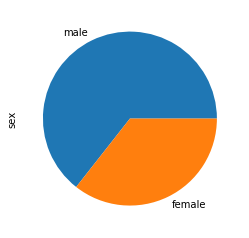

In [89]:
titanic['sex'].value_counts().plot.pie()

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

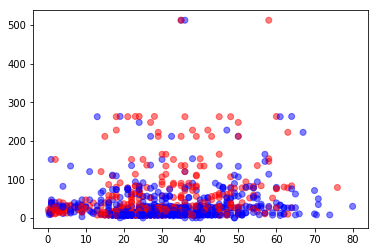

In [108]:
titanic = titanic.dropna(subset=['sex'])
plt.xlabel = 'age'
plt.ylabel = 'fare'
mapping = {'male' : 'blue', 'female' : 'red'}
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=titanic['sex'].map(mapping))

## 2.5. Problem Statement: Data Cleaning

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],

'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],

'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],

'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
    
'12. Air France', '"Swiss Air"']})

In [160]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'],

'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],

'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],

'Airline': ['KLM(!)', ' (12)', '(British Airways. )',

'12. Air France', '"Swiss Air"']})

In [111]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],(12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [134]:
for i in range(len(df['FlightNumber'])):
    #print (df['FlightNumber'][i])
    #print (type(df['FlightNumber'][i]))
    if np.isnan(df['FlightNumber'][i]):
        df['FlightNumber'][i] = df['FlightNumber'][i-1] + 10

In [138]:
df.FlightNumber = df.FlightNumber.astype(int)

In [140]:
df.FlightNumber

0    10045
1    10055
2    10065
3    10075
4    10085
Name: FlightNumber, dtype: int32

2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

In [141]:
tmp_df = df

In [152]:
loc = tmp_df['From_To'].str.split('_',expand=True)
tmp_df['From'] = loc[0]
tmp_df['To'] = loc[1]
tmp_df.drop(columns =['From_To'],inplace=True)

In [153]:
tmp_df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),LoNDon,paris
1,10055,[],(12),MAdrid,miLAN
2,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,10075,[13],12. Air France,Budapest,PaRis
4,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [157]:
tmp_df['From'] = tmp_df.From.str.title()
tmp_df['To'] = tmp_df.To.str.title()
tmp_df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],(12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [161]:
df.drop(columns =["From_To"], inplace = True)
df['From']=tmp_df['From']
df['To']=tmp_df['To']
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM(!),London,Paris
1,NaN,[],(12),Madrid,Milan
2,10065.0,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,NaN,[13],12. Air France,Budapest,Paris
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,London


5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [164]:
delay = pd.DataFrame(df['RecentDelays'].values.tolist(), columns=['delay_1','delay_2','delay_3'])
delay

,delay_1,delay_2,delay_3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


## 2.6. Problem Statement: Pandas SQL

### Problem statement 1:

Read the following data set:

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

Rename the columns as per the description from this file:

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

Task:

Create a sql db from adult dataset and name it sqladb

In [3]:
from pandas import DataFrame, Series
import sqlite3 as db
from pandasql import sqldf
import sqlparse
import pandasql

In [5]:
pysqldf = lambda q: sqldf(q, locals())

In [6]:
pysqldf

<function __main__.<lambda>(q)>

In [15]:
adult = pd.read_csv('C:\\Users\\VAIBHAV\\Acadgild\\Assignment 6 -11\\adult.csv')

1. Select 10 records from the adult sqladb

In [16]:
print(sqldf("SELECT * FROM adult LIMIT 10;"))

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital_status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3  

2. Show me the average hours per week of all men who are working in private sector

In [31]:
print(sqldf("SELECT avg(hours_per_week) average_hours_per_week FROM adult  WHERE workclass LIKE '%Private%'"))

   average_hours_per_week
0               40.267096


3. Show me the frequency table for education, occupation and relationship, separately

In [11]:
print(sqldf("SELECT education , COUNT(education) frequency FROM adult GROUP BY education "))

        education  frequency
0            10th        933
1            11th       1175
2            12th        433
3         1st-4th        168
4         5th-6th        333
5         7th-8th        646
6             9th        514
7      Assoc-acdm       1067
8       Assoc-voc       1382
9       Bachelors       5355
10      Doctorate        413
11        HS-grad      10501
12        Masters       1723
13      Preschool         51
14    Prof-school        576
15   Some-college       7291


4. Are there any people who are married, working in private sector and having a master’s degree

In [40]:
#This query will give count of people who are married, working in private sector and having a master’s degree
print(sqldf("""SELECT count(*) FROM adult 
                WHERE marital_status LIKE '%Married-spouse-absent%' AND workclass LIKE '%Private%' AND education LIKE '%Masters%'
                    or marital_status LIKE '%Married-civ-spouse%' AND workclass LIKE '%Private%' AND education LIKE '%Masters%'
                    or marital_status LIKE '%Married-AF-spouse%' AND workclass LIKE '%Private%' AND education LIKE '%Masters%'
                """))

   count(*)
0       540


In [41]:
print(sqldf("""SELECT * FROM adult 
                WHERE marital_status LIKE '%Married-spouse-absent%' AND workclass LIKE '%Private%' AND education LIKE '%Masters%'
                    or marital_status LIKE '%Married-civ-spouse%' AND workclass LIKE '%Private%' AND education LIKE '%Masters%'
                    or marital_status LIKE '%Married-AF-spouse%' AND workclass LIKE '%Private%' AND education LIKE '%Masters%'
                """))

     age workclass  fnlwgt education  education-num          marital_status  \
0     37   Private  284582   Masters             14      Married-civ-spouse   
1     33   Private  202051   Masters             14      Married-civ-spouse   
2     76   Private  124191   Masters             14      Married-civ-spouse   
3     31   Private   99928   Masters             14      Married-civ-spouse   
4     35   Private  138992   Masters             14      Married-civ-spouse   
5     34   Private  142897   Masters             14      Married-civ-spouse   
6     62   Private  270092   Masters             14      Married-civ-spouse   
7     41   Private  445382   Masters             14      Married-civ-spouse   
8     33   Private  208405   Masters             14      Married-civ-spouse   
9     49   Private  192776   Masters             14      Married-civ-spouse   
10    51   Private  410114   Masters             14      Married-civ-spouse   
11    31   Private  118710   Masters             14 

5. What is the average, minimum and maximum age group for people working in different sectors

In [19]:
print(sqldf(" SELECT workclass as sector, AVG(age) averageAge, MIN(age) minAge, MAX(age) maxAge  FROM adult GROUP BY workclass "))

              sector  averageAge  minAge  maxAge
0                  ?   40.960240      17      90
1        Federal-gov   42.590625      17      90
2          Local-gov   41.751075      17      90
3       Never-worked   20.571429      17      30
4            Private   36.797585      17      90
5       Self-emp-inc   46.017025      17      84
6   Self-emp-not-inc   44.969697      17      90
7          State-gov   39.436055      17      81
8        Without-pay   47.785714      19      72


6. Calculate age distribution by country

In [53]:
#This question was not clear, as to what is needed as output
print(sqldf("SELECT min(age), max(age), native_country FROM adult GROUP BY native_country"))

    min(age)  max(age)               native_country
0         17        90                            ?
1         18        65                     Cambodia
2         17        80                       Canada
3         22        75                        China
4         18        75                     Columbia
5         21        82                         Cuba
6         18        78           Dominican-Republic
7         21        90                      Ecuador
8         17        79                  El-Salvador
9         17        90                      England
10        20        64                       France
11        18        74                      Germany
12        22        65                       Greece
13        19        66                    Guatemala
14        17        63                        Haiti
15        32        32           Holand-Netherlands
16        18        58                     Honduras
17        19        60                         Hong
18        24

7. Compute a new column as 'Net-Capital-Gain' from the two columns 'capitalgain' and 'capital-loss'

In [43]:
print (sqldf("SELECT *, (capital_gain - capital_loss) AS Net_Capital_Gain FROM adult"))

       age          workclass  fnlwgt      education  education-num  \
0       39          State-gov   77516      Bachelors             13   
1       50   Self-emp-not-inc   83311      Bachelors             13   
2       38            Private  215646        HS-grad              9   
3       53            Private  234721           11th              7   
4       28            Private  338409      Bachelors             13   
5       37            Private  284582        Masters             14   
6       49            Private  160187            9th              5   
7       52   Self-emp-not-inc  209642        HS-grad              9   
8       31            Private   45781        Masters             14   
9       42            Private  159449      Bachelors             13   
10      37            Private  280464   Some-college             10   
11      30          State-gov  141297      Bachelors             13   
12      23            Private  122272      Bachelors             13   
13    

### Problem statement 2:

Read the following data set:
    
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

Task:

1. Create an sqlalchemy engine using a sample from the data set


In [8]:
import sqlalchemy
import pandas as pd
from sqlalchemy import create_engine

In [10]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',sep=",",header=None)
df.columns=['age','workclass','fnlwgt','education','educationNum','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
engine = create_engine('sqlite:///myData.db')
df.to_sql('alchemy', engine)

##### 2. Write two basic update queries

In [11]:
#update query
print(engine.execute('''UPDATE alchemy
SET income = '<30K'
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13'''))


In [12]:

#after updating the record
print(engine.execute('''SELECT * FROM alchemy
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13 ''').fetchall())

[(0, 39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40, ' United-States', '<30K')]


In [13]:

#update query2
print(engine.execute('''UPDATE alchemy
SET income = '<30K'
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9'''))


In [14]:
print(engine.execute('''SELECT * FROM alchemy
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9''').fetchall())

[(2, 38, ' Private', 215646, ' HS-grad', 9, ' Divorced', ' Handlers-cleaners', ' Not-in-family', ' White', ' Male', 0, 0, 40, ' United-States', '<30K')]


##### 3. Write two delete queries

In [15]:
#deleting the record
print(engine.execute('''DELETE FROM alchemy
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13'''))

In [16]:
#deleting the record
print(engine.execute('''DELETE FROM alchemy
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9'''))


#####  4. Write two filter queries

In [17]:
print(engine.execute('''SELECT * FROM alchemy WHERE race LIKE ' W%' ''').fetchall())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
print(engine.execute('''SELECT * FROM alchemy WHERE age  IN(30, 40) ''').fetchall())

[(11, 30, ' State-gov', 141297, ' Bachelors', 13, ' Married-civ-spouse', ' Prof-specialty', ' Husband', ' Asian-Pac-Islander', ' Male', 0, 0, 40, ' India', ' >50K'), (14, 40, ' Private', 121772, ' Assoc-voc', 11, ' Married-civ-spouse', ' Craft-repair', ' Husband', ' Asian-Pac-Islander', ' Male', 0, 0, 40, ' ?', ' >50K'), (20, 40, ' Private', 193524, ' Doctorate', 16, ' Married-civ-spouse', ' Prof-specialty', ' Husband', ' White', ' Male', 0, 0, 60, ' United-States', ' >50K'), (33, 30, ' Federal-gov', 59951, ' Some-college', 10, ' Married-civ-spouse', ' Adm-clerical', ' Own-child', ' White', ' Male', 0, 0, 40, ' United-States', ' <=50K'), (59, 30, ' Private', 188146, ' HS-grad', 9, ' Married-civ-spouse', ' Machine-op-inspct', ' Husband', ' White', ' Male', 5013, 0, 40, ' United-States', ' <=50K'), (60, 30, ' Private', 59496, ' Bachelors', 13, ' Married-civ-spouse', ' Sales', ' Husband', ' White', ' Male', 2407, 0, 40, ' United-States', ' <=50K'), (76, 40, ' Private', 32214, ' Assoc-acdm

##### 5. Write two function queries

In [19]:
print(engine.execute('''SELECT * FROM alchemy
WHERE LENGTH(workclass)==8 ''').fetchall())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
print(engine.execute('''SELECT sex,upper(sex) FROM alchemy
WHERE LENGTH(workclass)==9 ''').fetchall())

[]
